In [70]:
%pylab inline
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# You're only as old as you feel

Using the awesome [Alchemy API](http://www.alchemyapi.com/api/face-detection/urls.html) free facial recognition software, I decided to test see if a computer can guess ages and gender.  This technology does all the "heavy-lifting".  It's a black box to me, but it does some really cool stuff.  We'll focus on facial recognition, but it also has natural language processing technology (ie reading articles and figuring out of they are positive or negative).


#### Load some peoples

I used facebook to track the URL to some pictures of my friends, with unobstructed views of their faces and seemingly good image quality.  Then I grabbed a bunch of group and individual pics of celebrities.  Let's write a quick function to read in the images and display them.

In [71]:
import skimage.io as skio
import os 

BUDDIES = dict(ADAM_PAM = 'https://fbcdn-sphotos-h-a.akamaihd.net/hphotos-ak-xap1/v/t1.0-9/10376166_822056220894_5561513357790421351_n.jpg?oh=9ebbb3689ed812bf382d44de9cc70cf3&oe=558EE0E2&__gda__=1431275407_c369c759180795f48f510934549726bc',
               CLAIRE = 'https://scontent.xx.fbcdn.net/hphotos-xap1/v/t1.0-9/972052_10151392945616852_2137233219_n.jpg?oh=1991c7b817049105d758adad1fa33977&oe=5553882C',
               LUCAS_FRENZ = 'https://fbcdn-sphotos-g-a.akamaihd.net/hphotos-ak-xpa1/v/t1.0-9/10420147_850089067844_7304615519059766508_n.jpg?oh=7dcc9c28ad6f08b3940b0fd6e6a3ca6e&oe=558B0F7D&__gda__=1435652352_f74757242f9ed9ac336102acb17ffa4e',
               SAMMI_TONY = 'https://scontent.xx.fbcdn.net/hphotos-xfp1/v/t1.0-9/10686867_10102938908690283_3719803132104144472_n.jpg?oh=053d7da50ff7d297393eef96505e8326&oe=558F7F0C',
               ZACH = 'https://fbcdn-sphotos-g-a.akamaihd.net/hphotos-ak-xpf1/v/t1.0-9/10994273_10102416274827895_3192037160183659148_n.jpg?oh=e82f5404c950996327a34e4cb28c6262&oe=554B6A89&__gda__=1431240182_548bded0dcddadca1ec7d1c5c5b0ca2b',
               LAURA_DARREN = 'https://scontent.xx.fbcdn.net/hphotos-xfp1/v/t1.0-9/10527273_10100171830791771_5473228770575944118_n.jpg?oh=5a823b31e5c197afd87a69aee57037b9&oe=554F2CB6'
              )

CELEBS = dict(GOT_GALS = 'http://media4.popsugar-assets.com/files/2013/07/04/088/n/4981324/cdf19997323733ea_Main.xxxlarge/i/Pictures-Women-Game-Thrones-Emilia-Clarke.jpg',
              GOT_GUYS = 'http://media1.popsugar-assets.com/files/2014/06/13/959/n/1922283/462854365d4d1e3f_GoT-Cover.xxxlarge/i/Hottest-Guys-Game-Thrones.jpg',
              INKMASTER = 'http://www.slangstrong.com/wp-content/uploads/2012/11/Ink-Masters.jpg',
              FASTFIVEGUYS = 'http://thatsenuff.com/wp-content/uploads/2011/04/0429-rather-obvi-credit.jpg',
              MROD = 'http://d1oi7t5trwfj5d.cloudfront.net/81/3e/1e704c3c4232b7d10eaf67f8d260/michelle-rodriguez.jpg',
              EVA='http://media1.popsugar-assets.com/files/2013/01/02/3/192/1922398/d8a83663d4d95316_evamendes.xxxlarge_2.jpg',
              OMFG_RYGOS='http://blogs.psychcentral.com/life-goals/files/2015/01/ryan-gosling.jpg',
              THE_CLOONE='http://img2-2.timeinc.net/people/i/2014/sandbox/news/140210/george-clooney-600x450.jpg',
              REAL_HOUSEWIVES='http://media.silive.com/entertainment_impact_tvfilm/photo/real-housewives-of-new-jerseyjpg-87e95765ec41dcc8.jpg'
              )
              
US_AND_THEM = dict(BUDDIES.items() + CELEBS.items())
              

def showimage(url_or_array):
    """ Displays linked image; removes x/y labels"""
    if isinstance(url_or_array, basestring):
        out = imshow(skio.imread(url_or_array))
    else:
        out = imshow(url_or_array)

    # Hide x and y values
    return out

So for example, the pic of me and Pam looks like:

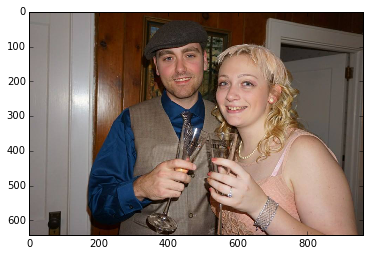

In [72]:
showimage(US_AND_THEM['ADAM_PAM']);

And for ink master:

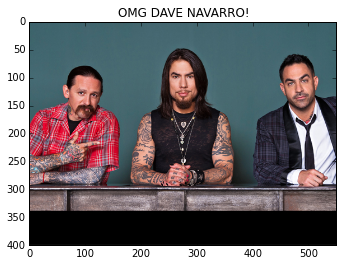

In [73]:
showimage(CELEBS['INKMASTER'])
plt.title("OMG DAVE NAVARRO!");

#### Face Finding

Next, I have to load Alchemy's Python SDK and then I can pass these images into the face recognition features.

In [74]:
os.chdir('/home/glue/Desktop/alchemyapi_python/')
from alchemyapi import AlchemyAPI

api = AlchemyAPI() #<-- Instantiate

We can use `AlchemyAPI.faceTagging` to find one or more faces in an image.

In [75]:
api.faceTagging('url', BUDDIES['ADAM_PAM'])

{u'imageFaces': [{u'age': {u'ageRange': u'18-24', u'score': u'0.502411'},
   u'gender': {u'gender': u'MALE', u'score': u'0.989013'},
   u'height': u'156',
   u'positionX': u'357',
   u'positionY': u'79',
   u'width': u'156'},
  {u'age': {u'ageRange': u'35-44', u'score': u'0.506266'},
   u'gender': {u'gender': u'FEMALE', u'score': u'0.992608'},
   u'height': u'172',
   u'positionX': u'511',
   u'positionY': u'146',
   u'width': u'172'}],
 u'status': u'OK',
 u'totalTransactions': u'4',
 u'url': u'https://fbcdn-sphotos-h-a.akamaihd.net/hphotos-ak-xap1/v/t1.0-9/10376166_822056220894_5561513357790421351_n.jpg?oh=9ebbb3689ed812bf382d44de9cc70cf3&oe=558EE0E2&__gda__=1431275407_c369c759180795f48f510934549726bc',
 u'usage': u'By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html'}

### Store the Faces Pythonically

Rather than work with these JSON streams, I'll build a class to store a face.  Some of the metatadata stored on the face will include:
     
     - Pixels in original image where face is
     - Reference to original image
     - Predicted gender and confidence score
     - Predicted ageRange and confidence score
     
The code below defines such a class.  If you're not a programmer, just overlook it.  These are being stored in a namedtuple for code brevity.

In [76]:
from collections import namedtuple

# Custom named tuple class, custom printout
Face = namedtuple('Face', ['face', 'index', 'gender', 'genderscore', 'agerange', 'agescore'], verbose=False)

def newrep(obj):
    return 'FACE_{o.index} ({o.gender} {o.genderscore}, {o.agerange} {o.agescore})'.format(o=obj)
Face.__repr__ = newrep


def cutface(image, facetag):
    """ Given original image and JSON face tag, crop out the face. """
    
    def _parseFace(attr):
        return int(facetag[attr])

    X, Y, WIDTH, HEIGHT = _parseFace('positionX'), _parseFace('positionY'), _parseFace('width'), _parseFace('height')
    return image[Y:Y+HEIGHT, X:X+WIDTH]

def mapfaces(facedict):
    """ Takes a dictionary of name:url (see BUDDIES above) and returns name:Face,
    where FACE is the python class for storing image face and metadata.
    """

    out = {}
    for name, imageurl in US_AND_THEM.items():
        try:
            faces = api.faceTagging('url', imageurl)['imageFaces']
        except Exception as exc:
            print "FAILED ON IMAGE: %s with exception:\n%s" % (name, exc.message)
            continue
        image = skio.imread(imageurl)
        out[name] = []
    
        # Iterate over faces, store
        for (idx, facetag) in enumerate(faces):
            faceregion = cutface(image, facetag)
            gender = facetag['gender']['gender']
            genderscore = float(facetag['gender']['score'])
            agerange = facetag['age']['ageRange']
            agescore = float(facetag['age']['score'])
            out[name].append(Face(faceregion, idx, gender, genderscore, agerange, agescore))
    return out
    
# THIS ACTUALLY DOES THE MAPPING
US_AND_THEM = mapfaces(US_AND_THEM)

Now the face regions of the image, as well as the important metadata', are stored in a list of `Face` classes.  The list is called `FACES`.  Some images have multiples faces, and we can access the face image from the `face` attribute.

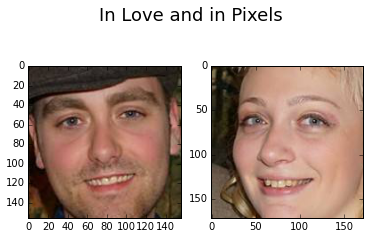

In [77]:
adam, pam = US_AND_THEM['ADAM_PAM']

f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(adam.face)
ax2.imshow(pam.face)
f.suptitle('In Love and in Pixels', fontsize=18);

### Analytics

The Alchemy facial recognition algorithm predicts age range and gender.  It also gives a confidence score to these predictions.  Let's presume the confidence in gender could be interpreted as "most manly", even though it really doesn't mean this.  How confident in the prediction of "MAN" is the algorithm?  We can split the list up by gender.

In [78]:
# BUDDIES SHOULD STORE LIST NOT DICTIONARY THEN DONT HAVE TO FLATTEN
ALL = []
MEN = []
WOMEN = []
for faces in US_AND_THEM.values():
    for face in faces:
        ALL.append(face)
        if face.gender == 'MALE':
            MEN.append(face)
        else:
            WOMEN.append(face)

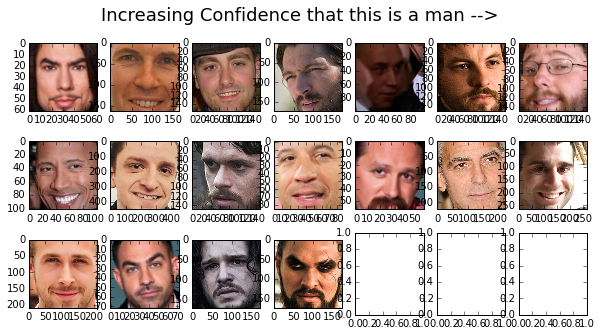

In [79]:
MANLIEST = sorted(MEN, key=lambda x: x.genderscore)
f, axes = plt.subplots(3,(int(1+len(MEN)/3.0)), figsize=(10,5))
flat = axes.flat
for (idx, man) in enumerate(MANLIEST):
    ax = flat[idx]
    ax.imshow(man.face)
    ax.set_title = man.genderscore
f.suptitle('Increasing Confidence that this is a man -->', fontsize=18);

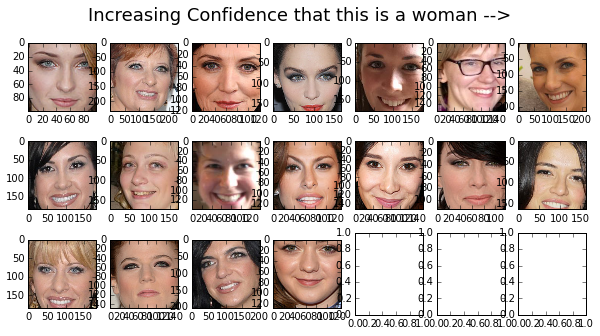

In [80]:
WOMANLIES = sorted(WOMEN, key=lambda x: x.genderscore)
f, axes = plt.subplots(3,(int(1+len(MEN)/3.0)), figsize=(10,5))
flat = axes.flat
for (idx, woman) in enumerate(WOMANLIES):
    ax = flat[idx]
    ax.imshow(woman.face)
    ax.set_title = woman.genderscore
f.suptitle('Increasing Confidence that this is a woman -->', fontsize=18);

### Age Prediction

In [81]:
#Get all age groups
agegroups = set([p.agerange for p in ALL])

#Group in dict
BY_AGE = dict((group,[]) for group in agegroups)
for face in ALL:
    BY_AGE[face.agerange].append(face)    

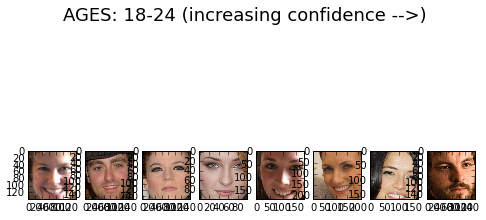

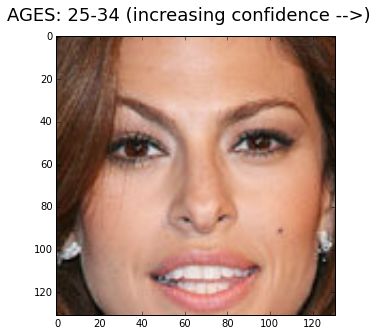

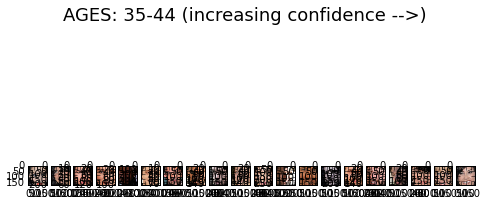

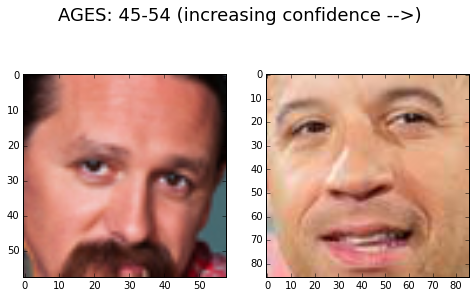

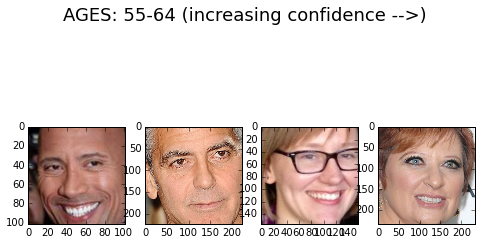

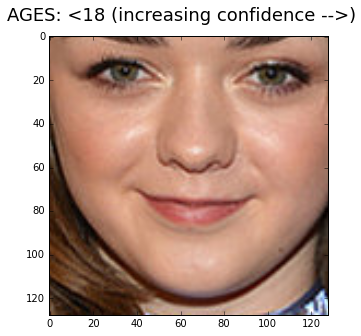

In [86]:
for group, faces in sorted(BY_AGE.items()):
    f, axes = plt.subplots(1,len(faces), figsize=(8,5))

    #Sort faces in each age group by confidence of age group
    faces = sorted(faces, key=lambda x: x.agescore, reverse=False)
    for (idx, face) in enumerate(faces):
        try:
            ax = axes[idx]
        except TypeError:
            ax = axes #<--- IF length 1
        ax.imshow(face.face)
    f.suptitle('AGES: %s (increasing confidence -->)'%group, fontsize=18);

### Why should I believe it?

You shouldn't!  We're using just a single picture for each person for starters.  The variation in a face due to facial hair, expression, image quality etc... is drastic.  Not to mention we don't know anything about the training data or underlying algorithm (not to say they're not good, just it's kind of a black box).

NameError: name 'ADAM_PAM' is not defined

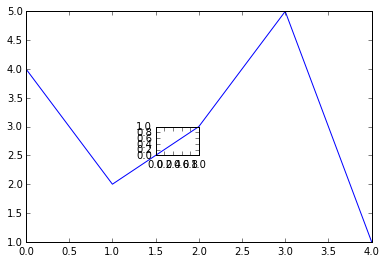

In [83]:
fig = matplotlib.pyplot.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
axicon = fig.add_axes([0.4,0.4,0.1,0.1])
ax.plot(range(5), [4,2,3,5,1])
axicon.imshow(skio.imread(ADAM_PAM))
axicon.set_xticks([])
axicon.set_yticks([])
fig.show()